In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# **Traingular Rational Continuos (TRC) Simulated Hyetograph -  Design storm Implementation**

In [2]:
# To implement the TRC design storm technique, the rational distribution method is used to create the hyetograph. 

# The TRC model ensures that the peak hyetograph is located near the middle of the simulation period. 
# Prompt user to input the total duration (in hours) and the precipitation depth, 
# Then we'll use a 1-hour time interval to spread the precipitation depth across the simulation period. 
# We'll finally plot the hourly simulated precipitation.

In [3]:
# Steps to create the TRC hyetograph:

# 1) Prompt the user to input the total duration and precipitation depth.
# 2) Calculate the peak precipitation value using the rational distribution method.
# 3) Create the hyetograph by distributing the precipitation around the peak using a triangular distribution pattern.
# 4) Plot the hourly simulated precipitation.

# **NRCS (Random distribution)**

Enter duration (hours):  24
Enter total precipitation depth (mm):  304


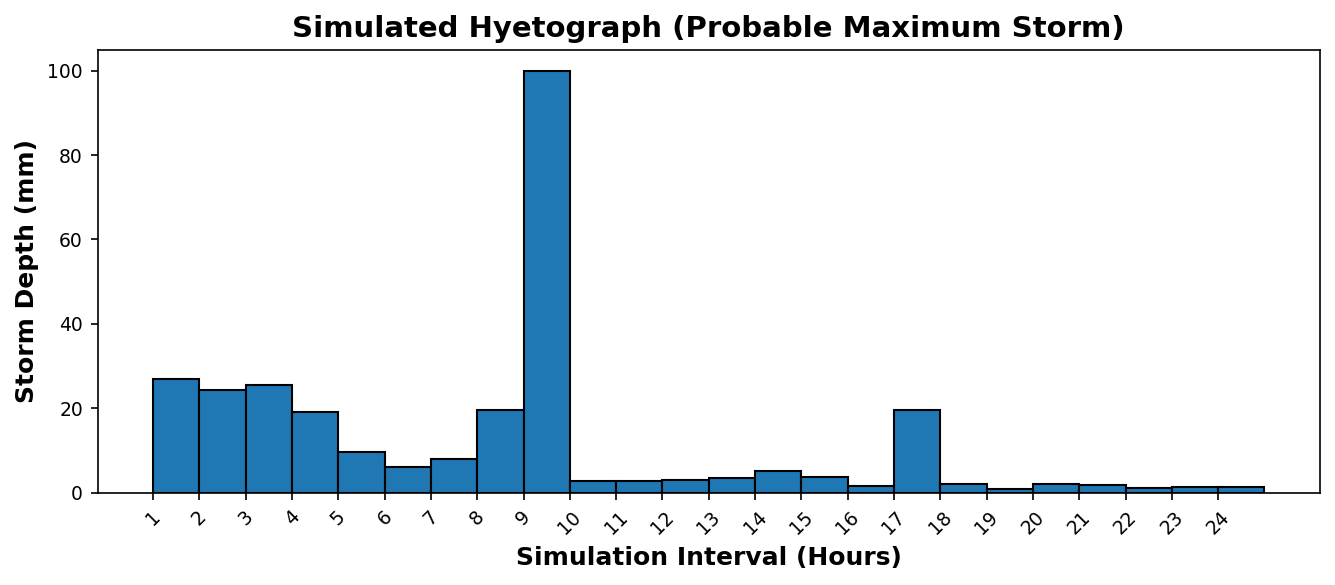

Do you want to save the hyetograph to a CSV file? (yes/no):  yes
Enter CSV filename (e.g., output.csv):  sim1_random.csv


Hyetograph saved to sim1_random.csv


In [2]:
def generate_hyetograph(duration, total_precipitation, interval):
    num_intervals = int(duration // interval)
    remaining_precipitation = total_precipitation

    hyetograph = np.zeros(num_intervals)
    
    peak_interval1 = num_intervals // 3  # Interval for the first peak
    peak_interval2 = 2 * num_intervals // 3  # Interval for the second peak
    
    for i in range(num_intervals):
        if i == peak_interval1 or i == peak_interval2:
            peak = np.random.uniform(0.4, 0.7) * remaining_precipitation
            hyetograph[i] = peak
            remaining_precipitation -= peak
        else:
            decrease = np.random.uniform(0.03, 0.12) * remaining_precipitation
            hyetograph[i] = decrease
            remaining_precipitation -= decrease

    return hyetograph

# def generate_hyetograph(duration, total_precipitation, interval):
#     num_intervals = int(duration // interval)  # Convert duration to integer
#     remaining_precipitation = total_precipitation

#     hyetograph = np.zeros(num_intervals)
    
#     peak_interval = num_intervals // 2  # Interval at the center
    
#     for i in range(num_intervals):
#         if i == peak_interval:  # Peak at the center
#             peak = np.random.uniform(0.5, 1.0) * remaining_precipitation  #(0.5, 1.0)
#             hyetograph[i] = peak
#             remaining_precipitation -= peak
#         else:
#             decrease = np.random.uniform(0.05, 0.15) * remaining_precipitation   #(0.05, 0.15)  0.4, 0.7   , 0.03, 0.12
#             hyetograph[i] = decrease
#             remaining_precipitation -= decrease

#     return hyetograph


def plot_hyetograph(interval, hyetograph):
    time = np.arange(0, len(hyetograph)) * interval
    # plt.figure(figsize=(10, 6))
    plt.figure(figsize=(9, 4), dpi=150)
    labels = ['1', '2', '3', '4', '5', '6', '7', '8','9', '10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
    plt.bar(time, hyetograph,  align='edge', width=1, edgecolor='black') # align='edge', 
    plt.xlabel('Simulation Interval (Hours)', fontweight='bold', fontsize=12)
    plt.ylabel('Storm Depth (mm)', fontweight='bold', fontsize=12)
    plt.title('Simulated Hyetograph (Probable Maximum Storm)', fontweight='bold', fontsize=14)
    
    # time = np.arange(1, time)
    plt.xticks(time, labels, rotation=45, fontsize=6, ha='center')
    plt.tick_params(axis='both', which='major', labelsize=9)
    
    plt.tight_layout()
    # plt.savefig("maps/Sim1.png")
    plt.show()

def save_to_csv(filename, interval, hyetograph):
    time = np.arange(0, len(hyetograph)) * interval
    data = list(zip(time, hyetograph))
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Simulation Interval (Hours)', 'Precipitation Depth (mm)'])
        writer.writerows(data)

def main():
    duration = float(input("Enter duration (hours): "))
    total_precipitation = float(input("Enter total precipitation depth (mm): "))
    interval = 1.0  # 1-hr interval
    
    hyetograph = generate_hyetograph(duration, total_precipitation, interval)
    
    plot_hyetograph(interval, hyetograph)
    
    save_csv = input("Do you want to save the hyetograph to a CSV file? (yes/no): ")
    if save_csv.lower() == 'yes':
        filename = input("Enter CSV filename (e.g., output.csv): ")
        save_to_csv(filename, interval, hyetograph)
        print(f"Hyetograph saved to {filename}")

if __name__ == "__main__":
    main()

# **NRCS Design Storm**

Enter the total duration (in hours):  24
Enter the precipitation depth (in mm):  304


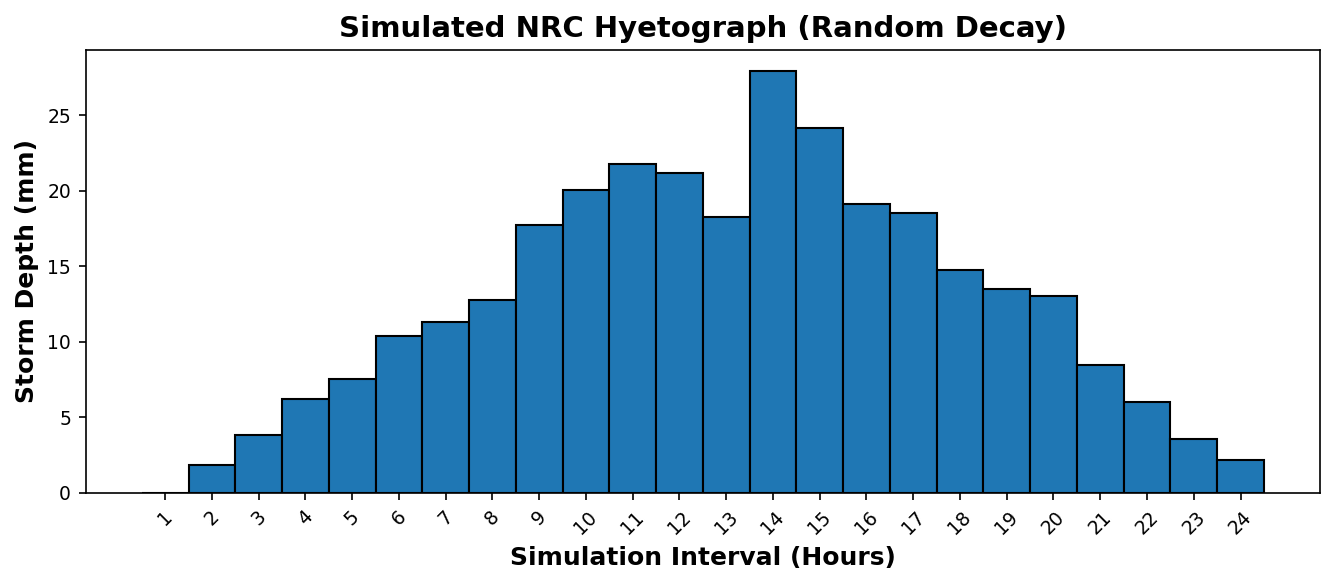

Do you want to save the output to a CSV? (yes/no):  yes
Enter the filename for the CSV:  sim2d_randDecay.csv


Hyetograph data saved to sim2d_randDecay.csv.csv


In [8]:
# def nrcs_design_storm(I_p, t_p, simulation_duration):
#     """
#     Calculate rainfall intensity (I) at time (t) using the NRCS design storms equation.

#     Args:
#         I_p (float): Peak rainfall intensity (inches per hour).
#         t_p (float): Time to peak rainfall intensity (hours).
#         t (float): Time at which intensity is to be calculated (hours).

#     Returns:
#         float: Rainfall intensity at time t.
#     """
#     # Define time intervals
#     timesteps = np.arange(0, simulation_duration + 1)

#     # Calculate precipitation depth at each time interval
#     precipitation_depths = (2 * I_p / t_p) * (1 - timesteps / t_p)

#     return precipitation_depths

# # Input parameters
# I_p = 4.0  # Peak intensity (inches per hour)
# t_p = 6.0  # Time to peak intensity (hours)
# simulation_duration = 24  # Duration of the simulation (hours)

# # Calculate precipitation depth
# precipitation_depths = nrcs_design_storm(I_p, t_p, simulation_duration)

# # Print the results
# print("Time (hours)\tPrecipitation Depth (inches)")
# for t, depth in enumerate(precipitation_depths):
#     print(f"{t}\t\t{depth:.2f}")


def trc_hyetograph(total_duration, precipitation_depth):
    peak_precipitation = precipitation_depth / np.sqrt(total_duration)
    time_axis = np.arange(1, total_duration + 1)
    hyetograph = np.zeros(total_duration)
    peak_index = total_duration // 2

    for t in time_axis:
        if t == peak_index + 1:
            hyetograph[peak_index] = peak_precipitation
        elif t < peak_index + 1:
            hyetograph[t - 1] = peak_precipitation * (t - 1) / peak_index
        else:
            hyetograph[t - 1] = peak_precipitation * (total_duration - t + 1) / peak_index

    for t in time_axis[1:]:
        adjustment = np.random.uniform(0.7, 1.3)
        hyetograph[t - 1] *= adjustment

    hyetograph *= (precipitation_depth / np.sum(hyetograph))

    return hyetograph

def save_to_csv(hyetograph, filename):
    data = {'Hour': np.arange(1, len(hyetograph) + 1), 'Precipitation (mm/hour)': hyetograph}
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    total_duration = int(input("Enter the total duration (in hours): "))
    precipitation_depth = float(input("Enter the precipitation depth (in mm): "))
    hyetograph = trc_hyetograph(total_duration, precipitation_depth)

    # Create a bar graph for the hyetograph
    plt.figure(figsize=(9, 4), dpi=150)
    labels = ['1', '2', '3', '4', '5', '6', '7', '8','9', '10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
    plt.bar(np.arange(1, total_duration + 1), hyetograph, width=1.0, edgecolor='black') #align='edge', width=1.0, align='center', width=0.8, edgecolor='black'
    plt.xlabel('Simulation Interval (Hours)', fontweight='bold', fontsize=12)
    plt.ylabel('Storm Depth (mm)', fontweight='bold', fontsize=12)
    plt.title('Simulated NRC Hyetograph (Random Decay)', fontweight='bold', fontsize=14)
    
    time = np.arange(1, total_duration + 1)
    plt.xticks(time, labels, rotation=45, fontsize=6, ha='center')
    plt.tick_params(axis='both', which='major', labelsize=9)
    
    plt.tight_layout()
    # plt.savefig("maps/Sim2.png")
    plt.show()

    save_csv = input("Do you want to save the output to a CSV? (yes/no): ").lower()
    if save_csv == 'yes':
        filename = input("Enter the filename for the CSV: ")
        save_to_csv(hyetograph, filename)
        print(f"Hyetograph data saved to {filename}.csv")

if __name__ == "__main__":
    main()

# **Modified NRCS**

Enter the total duration (in hours):  24
Enter the precipitation depth (in mm):  304


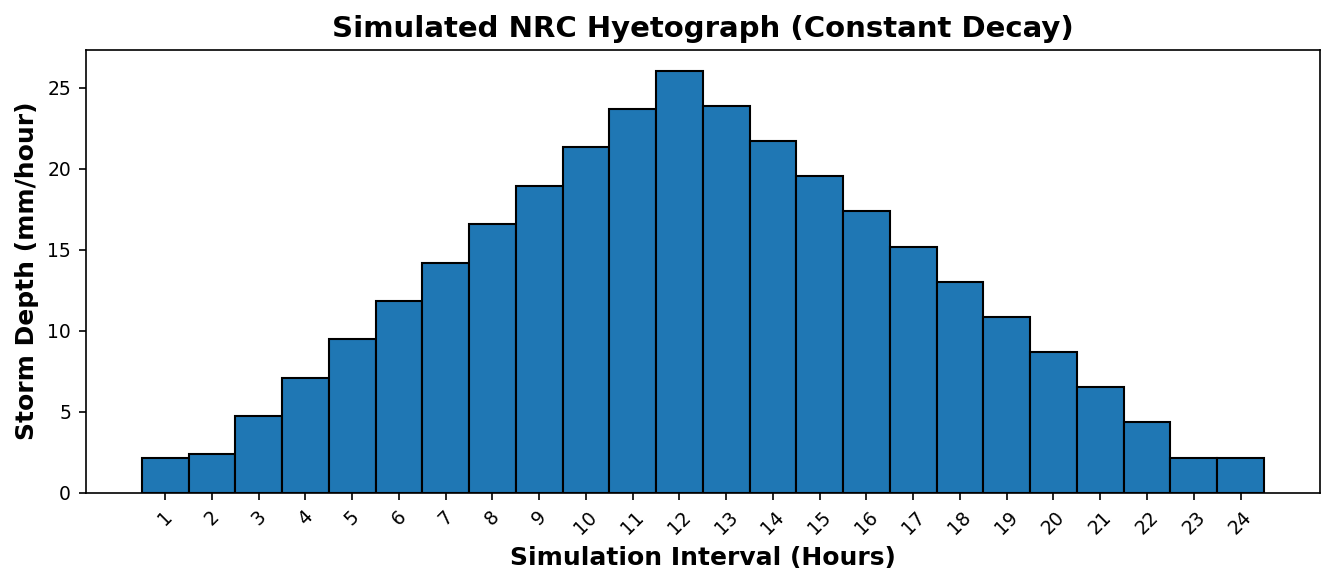

Do you want to save the output to a CSV? (yes/no):  yes
Enter the filename for the CSV:  sim3_constantDecay.csv


Hyetograph data saved to sim3_constantDecay.csv.csv


In [4]:
# def advanced_nrcs_design_storm(I_p, t_p, alpha, beta, simulation_duration):
#     """
#     Calculate rainfall intensity (I) at time (t) using the advanced NRCS design storms equation.

#     Args:
#         I_p (float): Peak rainfall intensity (inches per hour).
#         t_p (float): Time to peak rainfall intensity (hours).
#         t (float): Time at which intensity is to be calculated (hours).
#         alpha (float): Exponent alpha.
#         beta (float): Exponent beta.

#     Returns:
#         float: Rainfall intensity at time t.
#     """
#     # Define time intervals
#     timesteps = np.arange(0, simulation_duration + 1)

#     # Calculate precipitation depth at each time interval
#     precipitation_depths = (I_p / t_p) * (timesteps / t_p) ** alpha * np.exp(-beta * np.abs(I_p / t_p - 0.5))

#     return precipitation_depths

# # Input parameters
# I_p = 4.0  # Peak depth (inches)
# t_p = 6.0  # Time to peak depth (hours)
# alpha = 1.5  # Alpha parameter
# beta = 4.0  # Beta parameter
# simulation_duration = 24  # Duration of the simulation (hours)

# # Calculate precipitation depth
# precipitation_depths = advanced_nrcs_design_storm(I_p, t_p, alpha, beta, simulation_duration)

# # Print the results
# print("Time (hours)\tPrecipitation Depth (inches)")
# for t, depth in enumerate(precipitation_depths):
#     print(f"{t}\t\t{depth:.2f}")


def trc_hyetograph(total_duration, precipitation_depth):
    # Calculate the peak precipitation value at the 12-hour duration
    peak_precipitation = precipitation_depth / np.sqrt(total_duration)

    # Create the time axis for the hyetograph
    time_axis = np.arange(1, total_duration + 1)

    # Calculate the hyetograph values using the triangular distribution pattern
    hyetograph = np.zeros(total_duration)
    for t in time_axis:
        if t == 1:  # Special case for the first duration
            hyetograph[t - 1] = peak_precipitation * (t) / (total_duration / 2)
        elif t == total_duration:  # Special case for the last duration
            hyetograph[t - 1] = peak_precipitation * (total_duration - t + 1) / (total_duration / 2)
        elif t <= total_duration / 2:
            hyetograph[t - 1] = peak_precipitation * (t - 1) / (total_duration / 2 - 1)
        else:
            hyetograph[t - 1] = peak_precipitation * (total_duration - t) / (total_duration / 2)

    # Normalize the hyetograph to have the total precipitation depth equal to the input depth
    hyetograph *= (precipitation_depth / np.sum(hyetograph))

    return hyetograph

def plot_step(x, y, label):
    x_step = np.repeat(x, 2)[1:]
    y_step = np.repeat(y, 2)[:-1]
    plt.plot(x_step, y_step, label=label)

def main():
    # Get user input for total duration and precipitation depth
    total_duration = int(input("Enter the total duration (in hours): "))
    precipitation_depth = float(input("Enter the precipitation depth (in mm): "))

    # Calculate the TRC hyetograph
    hyetograph = trc_hyetograph(total_duration, precipitation_depth)

    # Plot the hourly simulated precipitation with step function decay
    plt.figure(figsize=(9, 4), dpi=150)
    labels = ['1', '2', '3', '4', '5', '6', '7', '8','9', '10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
    plt.bar(np.arange(1, total_duration + 1), hyetograph, align='edge', width=1.0, edgecolor='black')
    plt.xlabel('Simulation Interval (Hours)', fontweight='bold', fontsize=12)
    plt.ylabel('Storm Depth (mm/hour)', fontweight='bold', fontsize=12)
    plt.title('Simulated NRC Hyetograph (Constant Decay)', fontweight='bold', fontsize=14)

    # Calculate bar centers and set tick positions and labels
    bar_centers = np.arange(1, total_duration + 1) + 0.5 # Adjusted for the middle of the bars
    plt.xticks(bar_centers, labels, rotation=45, fontsize=6, ha='center')
    plt.tick_params(axis='both', which='major', labelsize=9)
    
    plt.tight_layout()
    # plt.savefig("maps/Sim3.png")
    plt.show()

    save_csv = input("Do you want to save the output to a CSV? (yes/no): ").lower()
    if save_csv == 'yes':
        filename = input("Enter the filename for the CSV: ")
        save_to_csv(hyetograph, filename)
        print(f"Hyetograph data saved to {filename}.csv")

if __name__ == "__main__":
    main()

# **Plot Ogive**

In [22]:
df_storm = pd.read_csv('./sim_storm.csv')
# print(dfInv)
## Pass dataset to array

xar_storm = df_storm.to_xarray()

Du = xar_storm['Interval']; 
sim1 = xar_storm['sim1']; 
sim2 = xar_storm['sim2']; 
sim2a = xar_storm['sim2a']; 
sim2b = xar_storm['sim2b']; 
sim2c = xar_storm['sim2c']; 
sim2d = xar_storm['sim2d']; 
sim3 = xar_storm['sim3']; 
NRCS = xar_storm['NRCS_avg']; 

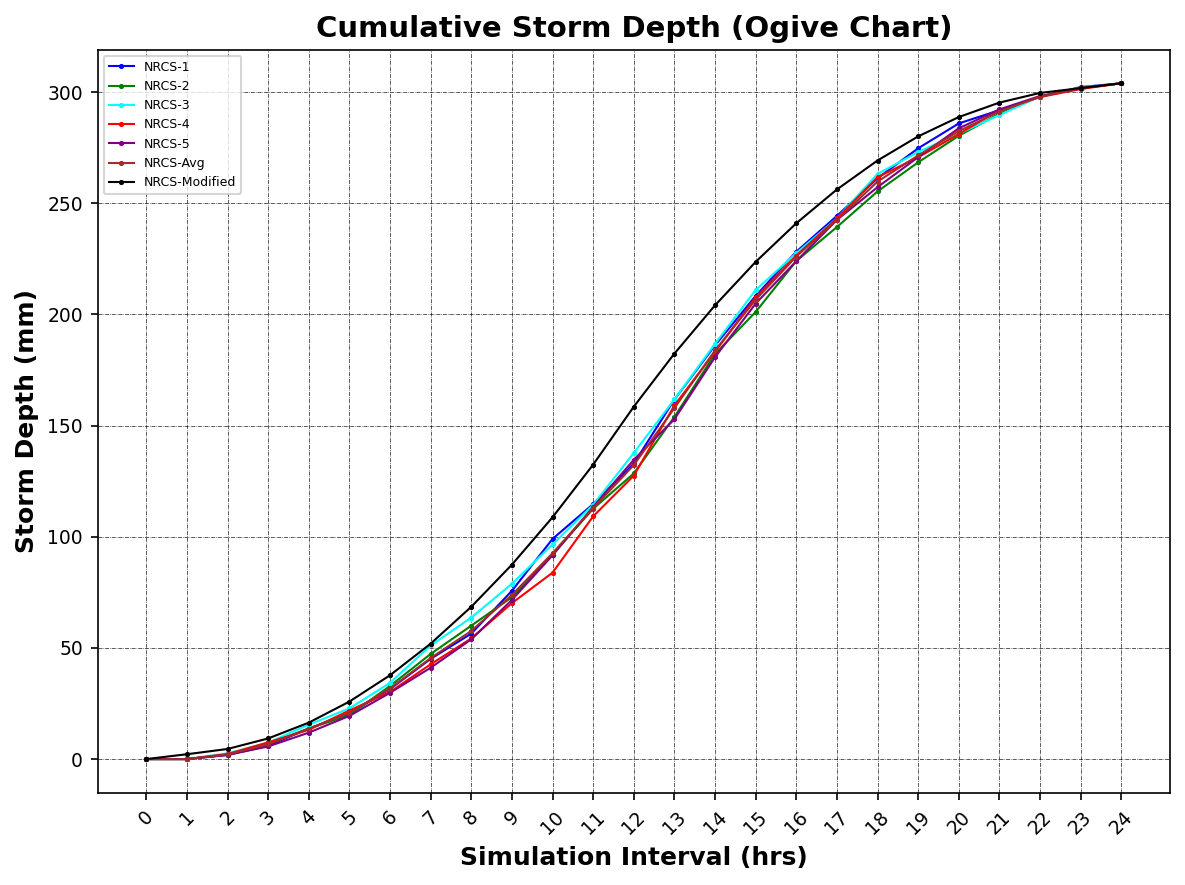

In [37]:
# Plot 
plt.figure(figsize=(8, 6), dpi=150)
# labels for x-asix
labels = ['0','1', '2', '3', '4', '5', '6', '7', '8','9', '10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']

plt.plot(Du, sim2, color='blue', marker = '.', markersize=3, linewidth=1, label = "NRCS-1")
plt.plot(Du, sim2a, color='green', marker = '.', markersize=3, linewidth=1, label = "NRCS-2")
plt.plot(Du, sim2b, color='cyan', marker = '.', markersize=3, linewidth=1, label = "NRCS-3")
plt.plot(Du, sim2c, color='red', marker = '.', markersize=3, linewidth=1, label = "NRCS-4")
plt.plot(Du, sim2d, color='purple', marker = '.', markersize=3, linewidth=1, label = "NRCS-5")
plt.plot(Du, NRCS, color='brown', marker = '.', markersize=3, linewidth=1, label = "NRCS-Avg")
plt.plot(Du, sim3, color='black', marker = '.', markersize=3, linewidth=1, label = "NRCS-Modified")
plt.xlabel('Simulation Interval (hrs)',  fontweight='bold', fontsize=12)
plt.ylabel('Storm Depth (mm)', fontweight='bold', fontsize=12)
plt.title('Cumulative Storm Depth (Ogive Chart)', fontweight='bold', fontsize=14)
plt.legend(loc=2, fontsize=6)
plt.xticks(Du, labels, rotation=45, fontsize=6)
plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')

plt.tight_layout()
# plt.savefig("maps/Ogive.png")
plt.show()

# **Plot Scatter**

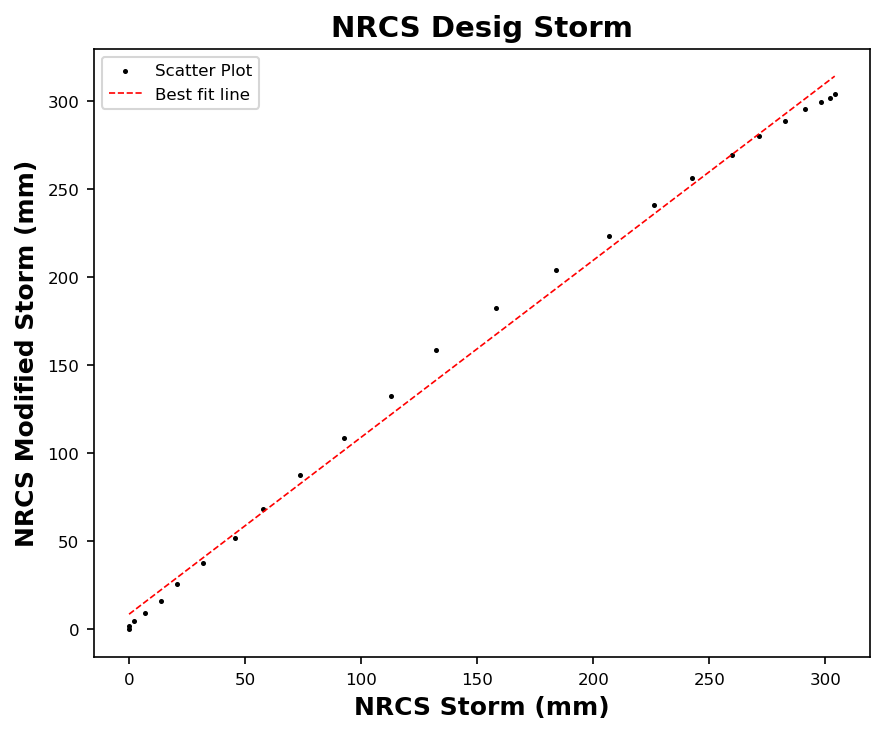

In [38]:
# Plot each output column against the unique "Year" values
plt.figure(figsize=(6, 5), dpi=150)

plt.scatter(NRCS, sim3, c="black", marker='o', s=2, label = "Scatter Plot")
a1, b1 = np.polyfit(NRCS, sim3, 1)
plt.plot(NRCS, a1*NRCS+b1, color='red', linestyle='--', linewidth=0.8, label = "Best fit line") 
plt.xlabel('NRCS Storm (mm)', fontweight='bold', fontsize=12)
plt.ylabel('NRCS Modified Storm (mm)', fontweight='bold', fontsize=12)
plt.title('NRCS Desig Storm', fontweight='bold', fontsize=14)
plt.legend(loc=2, fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
# plt.savefig("maps/NRCS_Storm.png")
plt.show()

# **Statistics**

In [41]:
import pandas as pd
import numpy as np
import math
import warnings

import time
import hydroeval as he
import json
import matplotlib.pyplot as plt
import xarray as xr
import sys
from datetime import date
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from scipy import stats
import statistics

In [43]:
def STATS(obs, pred):
    
    # Use hydroeval parameters
    pbias=he.evaluator(he.pbias, obs, pred)
    kge, r_cor, alpha, beta = he.evaluator(he.kge, obs, pred)
    r_cor_val = np.round(r_cor[0], 3)
    # #calculate other metrics
    slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(obs, pred)
    
    # # Calculate Relative Bias
    RB1 = ((sum(pred)-sum(obs))/sum(obs))*100
    RB = np.round(RB1.values, 3)
    
    # Calculate the Root Mean Square Error (NRMSE) and Normalized RMSE
    rmse = np.sqrt(np.mean((obs - pred) ** 2))
    rmse_val = np.round(rmse.values, 3)
    
    obs_range = np.max(obs) - np.min(obs)
    NRMSE = rmse / obs_range
    NRMSE_val = np.round(NRMSE.values, 3)

    print("------------Start--------------")
    print("r_Cor     =", (r_cor_val))
    print('Relative Bias:', RB);
    # print("RMSE      =", rmse_val) 
    # print("Normalized RMSE      =", NRMSE_val) 
    print("----------- END---------------")
    


ober = [NRCS]  # NRCS
img = [sim3]  # NRCS Modified
tit = ['30-min', '1-hr', '2-hr', '3-hr', '6-hr', '12-hr', '24-hr']

for obr, im, tt in zip(ober, img, tit):
    ob = obr;
    pred = im;
    output = STATS(ob, pred)
    print(output) 

------------Start--------------
r_Cor     = 0.998
Relative Bias: 6.485
----------- END---------------
None
